<a href="https://colab.research.google.com/github/Jeoneunjae/prac_class/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빙하의 감소추세 시각화

### DATA LOAD & IMPORT PACKAGES

In [2]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#경로 설정
DATA = '/content/drive/MyDrive/빙하data/train.csv' #데이터 월 및 파일명
DRIVE = '/content/drive/MyDrive/빙하data/'
DRIVE_DATA = '/content/drive/MyDrive/빙하data/train/' #npy data(1978~2018 월별 데이터)
                                                      #각 npy는 해빙농도, 북극점, 해안선 마스크, 육지마스크, 결측값으로 구성

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import os
%matplotlib inline

print(os.getcwd())

gc.enable()

/content


In [6]:
#DATA LOAD
train = pd.read_csv(DRIVE + 'train.csv')

In [7]:
#train data에서 78년 11월 12월 값 제거해주기=train.cvs의 1번째, 2번째 행 삭제
train=train.iloc[2:,:].reset_index(drop=True)
train.to_csv('train.csv')
train.shape #잘 삭제되었음을 알 수 있음.

(480, 2)

In [8]:
#Open a *.npy file and load it as an array

data = np.load(DRIVE_DATA+train['file_nm'][2])

### VISUALIZE DATA

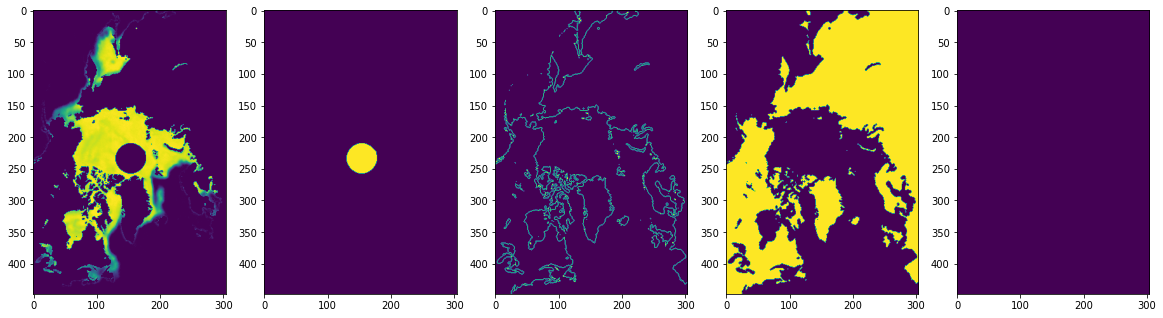

In [9]:
fig = plt.figure(figsize = (20, 30)) #그림 사이즈 조정
#해빙/북극점/해안/지면/결측치 5개 그림 나타내기
for iter in range(5):
    fig.add_subplot(1, 5, iter+1)
    plt.imshow(data[:, :, iter])
fig.show()

In [10]:
# 해빙 / 북극점 / 해안 / 지면 / 결측치 데이터 분리
thaw = pd.DataFrame()
thaw_pluse_pole = pd.DataFrame() 

In [11]:
train.shape

(480, 2)

In [12]:
total_data = []

for iter in range(0, train.shape[0]): #79년 1월부터 데이터 추출
    data = np.load(DRIVE_DATA+train['file_nm'][iter]) 
    total_data.append(data)
    thaw = pd.concat([thaw, pd.DataFrame(data[:, :, 0].reshape(1, -1))], ignore_index = True)
    thaw_pluse_pole = pd.concat([thaw_pluse_pole, pd.DataFrame(data[:, :, 1].reshape(1, -1))], ignore_index = True) 

total_data = np.array(total_data)
total_data.shape

(480, 448, 304, 5)

In [13]:
#월별 해빙농도의 합 계산
thaw_sum = np.array(thaw.sum(axis=1))
thaw_sum.shape

(480,)

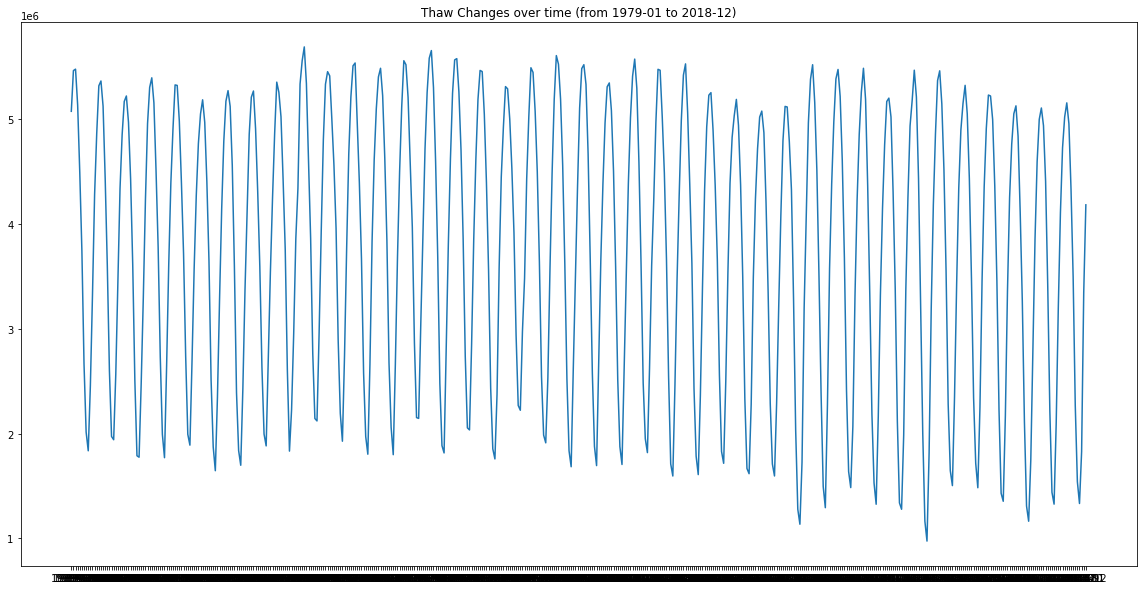

In [14]:
#해빙농도 합의 변화-각 월별 전체 지도의 해빙농도의 전체합을 그래프로 변화 추세 확인
plt.figure(figsize = (20,10))
plt.title('Thaw Changes over time (from 1979-01 to 2018-12)')
plt.plot(train['month'],thaw_sum)
plt.show()

계절의 영향으로 연도별 변화 추이를 명확하게 알기 어려움.

**해결방법: 1월부터 12월까지의 해빙농도합의 평균을 구해서 연도별로 나타내보기**



In [15]:
thaw_sum.shape

(480,)

In [16]:
thaw_sum_year=thaw_sum.reshape(40,12)
thaw_sum_year.shape

(40, 12)

In [17]:
thaw_mean_year= thaw_sum_year.mean(axis=1)

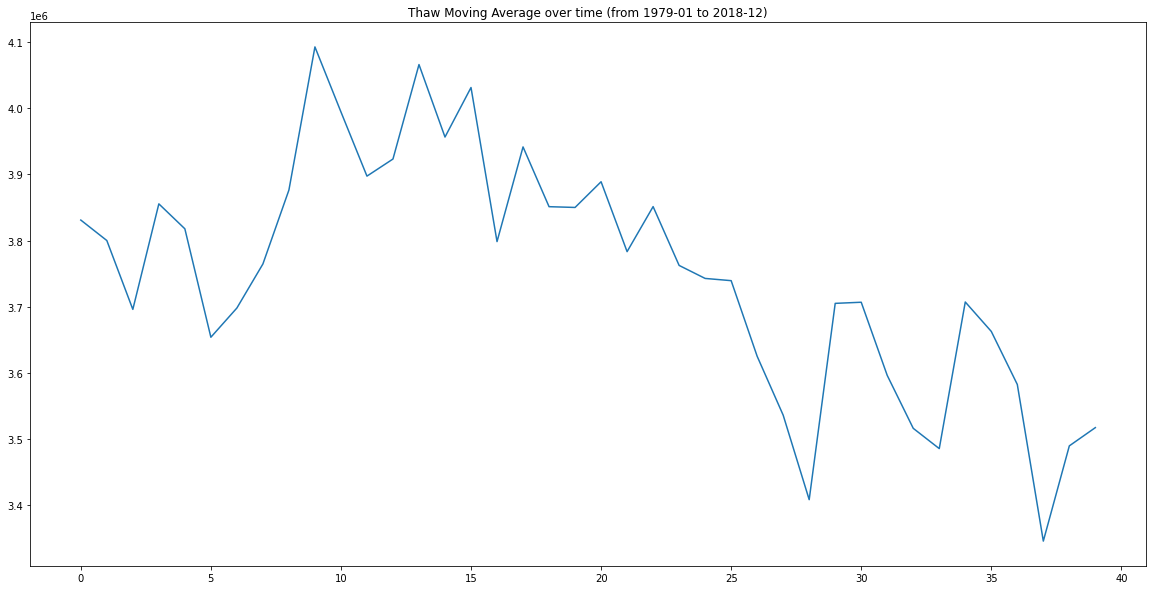

In [18]:
#연도별 평균 결빙도 변화 추이
plt.figure(figsize = (20,10))
plt.title('Thaw Moving Average over time (from 1979-01 to 2018-12)')
plt.plot(thaw_mean_year)
plt.show()
#가로축 설명: year1=1979, year40=2018

연도별 평균을 구하여 그 값을 그래프로 나타내었음에도 드라마틱하게 감소한다고 보기 힘듦.  
시간이 지날수록 기술이 발달하여 북극점 미관측지역을 잘 관찰할 수 있게 되었기 때문.

In [19]:
#북극점 미관측지역을 결빙도 250으로 채워서 해빙 데이터에 더해주기(해빙의 농도가 0~250이므로)
thaw_pluse_pole = total_data[:,:,:,0] + total_data[:,:,:,1] * 250

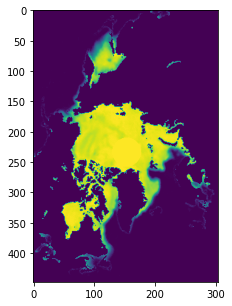

In [20]:
#visualization
plt.figure(figsize =  (5, 5))  
plt.imshow(thaw_pluse_pole[0, :, :])
fig.show()

In [21]:
thaw_pluse_pole = thaw_pluse_pole.reshape(thaw_pluse_pole.shape[0], thaw_pluse_pole.shape[1] * thaw_pluse_pole.shape[2])

In [29]:
thaw_pluse_pole.shape

(480, 136192)

In [32]:
thaw_pluse_pole_sum = np.array(thaw_pluse_pole.sum(axis=1))

In [34]:
thaw_pluse_pole_sum.shape

(480,)

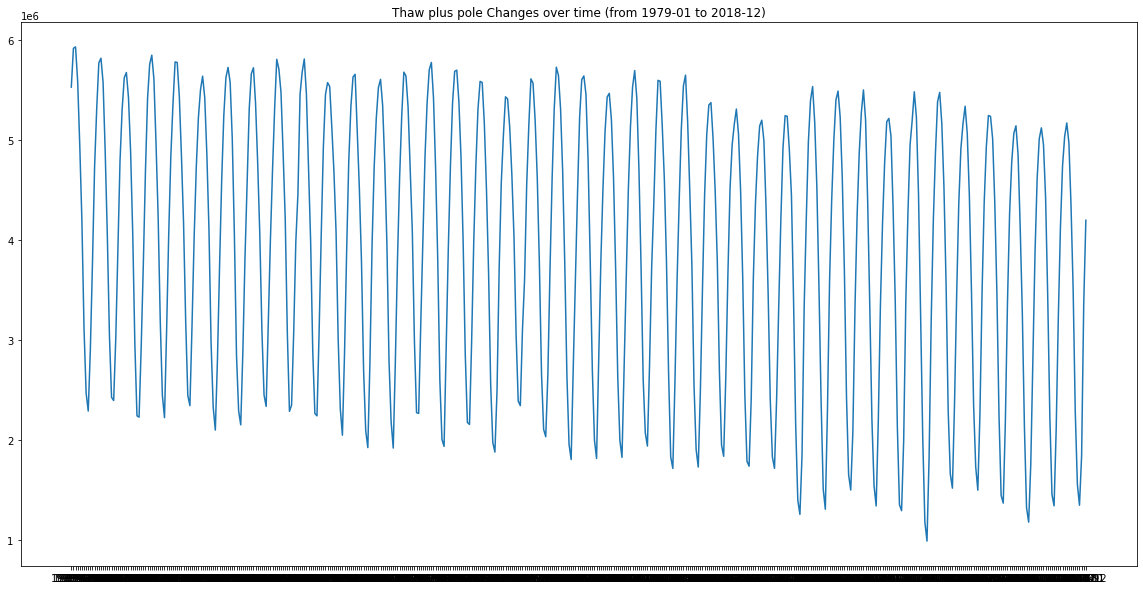

In [24]:
#미관측 영역을 결빙도 250으로 전부 채운 후 그린 결빙도 합의 그래프
plt.figure(figsize = (20,10))
plt.title('Thaw plus pole Changes over time (from 1979-01 to 2018-12)')
plt.plot(train['month'], thaw_pluse_pole_sum)
plt.show()

In [36]:
thaw_pluse_pole_sum.shape

(480,)

In [37]:
thaw_sum_plus_pole=thaw_pluse_pole_sum.reshape(40,12)
thaw_sum_plus_pole.shape

(40, 12)

In [38]:
thaw_mean_plus_pole= thaw_sum_plus_pole.mean(axis=1)

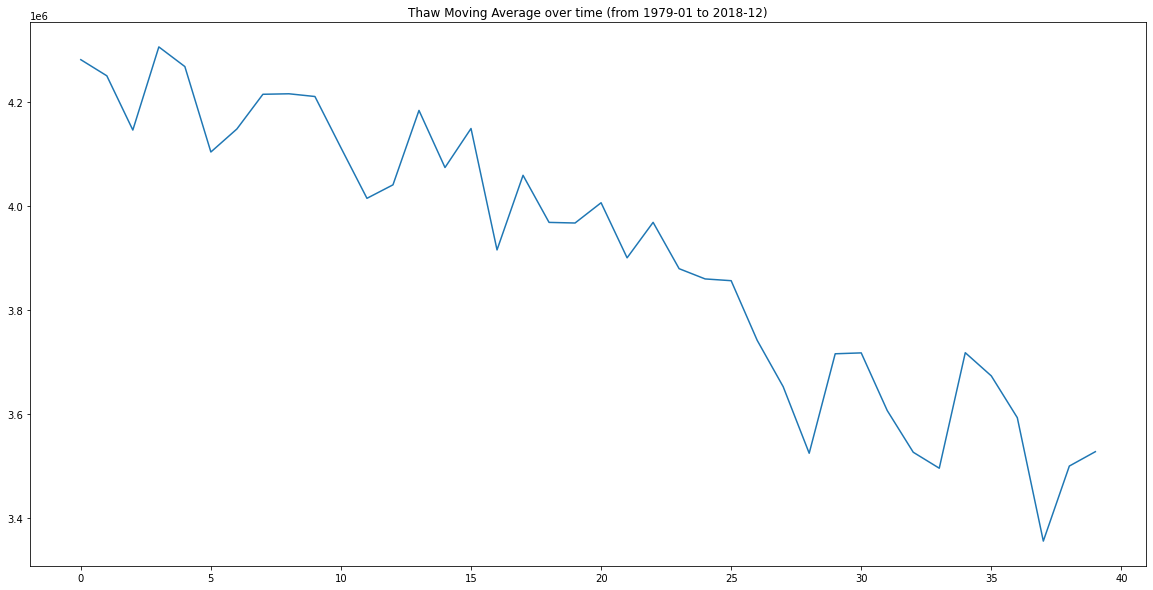

In [39]:
#연도별 평균 결빙도 변화 추이
plt.figure(figsize = (20,10))
plt.title('Thaw Moving Average over time (from 1979-01 to 2018-12)')
plt.plot(thaw_mean_plus_pole)
plt.show()
#가로축 설명: year1=1979, year40=2018

확실히 결빙도를 250으로 채우기 전과 달리 확연히 감소하고 있음을 확인할 수 있다.